In [1]:
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent[0])

2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [31]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > year_ago).filter(Measurement.prcp != 0.00).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df = df.dropna(how="any")
df.set_index('date', inplace=True,)


# Sort the dataframe by date
df = df.sort_values(by=['date'])
df=df.dropna()
df.head(10)
number_observations = len(df)
number_observations

1142

In [32]:
# create ticks and tick labels for the bar plot
results = session.query(Measurement.date).filter(Measurement.date > year_ago).filter(Measurement.prcp != 0.00).order_by(Measurement.date).all()

results=list(np.ravel(results))

labels=[]
    
ticks=np.arange(0,1142,142)

for index in ticks:
    labels.append(results[index])

print(ticks)
print(labels)


[   0  142  284  426  568  710  852  994 1136]
['2016-08-24', '2016-09-23', '2016-11-06', '2016-12-12', '2017-01-29', '2017-04-11', '2017-05-18', '2017-06-29', '2017-08-20']


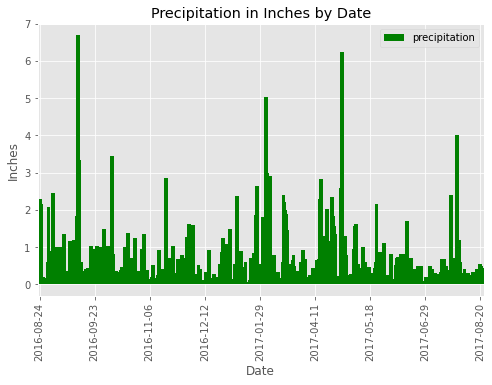

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='bar',width=10,alpha=1,color='g',figsize=(8,5))
plt.title("Precipitation in Inches by Date")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.ylim(-0.3,7)
plt.xticks(ticks=ticks, labels=labels,rotation=90)
plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,1142.000000
mean,0.311357
std,0.576134
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station).label('total')
             ).group_by(Measurement.station
                       ).order_by(desc('total')).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f'The minimum temperature is {round(min_temp[0][0])} degrees.')
print(f'The maximum temperature is {round(max_temp[0][0])} degrees.')
print(f'The average temperature is {round(avg_temp[0][0])} degrees.')

The minimum temperature is 54 degrees.
The maximum temperature is 85 degrees.
The average temperature is 72 degrees.


In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_data = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date > year_ago).order_by(Measurement.date).all()
active_data

active_df = pd.DataFrame(active_data, columns=['date','tobs'])
active_df = active_df.dropna(how="any")
active_df.head(10)

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
5,2016-08-29,78.0
6,2016-08-30,77.0
7,2016-08-31,78.0
8,2016-09-01,80.0
9,2016-09-02,80.0


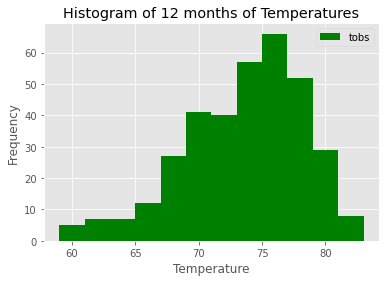

In [44]:
plt.hist(active_df['tobs'],color='g',bins=12,label="tobs")
plt.title("Histogram of 12 months of Temperatures")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()

# Close session

In [45]:
# Close Session
session.close()